# Homework-2: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [5]:
batch_size = 128
max_epoch = 25
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.005

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Epoch [0][25]	 Batch [0][429]	 Training Loss 7.7281	 Accuracy 0.0547
Epoch [0][25]	 Batch [50][429]	 Training Loss 5.6274	 Accuracy 0.1014
Epoch [0][25]	 Batch [100][429]	 Training Loss 3.0830	 Accuracy 0.1223
Epoch [0][25]	 Batch [150][429]	 Training Loss 2.2162	 Accuracy 0.1405
Epoch [0][25]	 Batch [200][429]	 Training Loss 1.7766	 Accuracy 0.1609
Epoch [0][25]	 Batch [250][429]	 Training Loss 1.5098	 Accuracy 0.1831
Epoch [0][25]	 Batch [300][429]	 Training Loss 1.3303	 Accuracy 0.2014
Epoch [0][25]	 Batch [350][429]	 Training Loss 1.2008	 Accuracy 0.2194
Epoch [0][25]	 Batch [400][429]	 Training Loss 1.1028	 Accuracy 0.2372

Epoch [0]	 Average training loss 1.0572	 Average training accuracy 0.2480
Epoch [0]	 Average validation loss 0.3993	 Average validation accuracy 0.4379

Epoch [1][25]	 Batch [0][429]	 Training Loss 0.4146	 Accuracy 0.3438
Epoch [1][25]	 Batch [50][429]	 Training Loss 0.3990	 Ac

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9201.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][25]	 Batch [0][429]	 Training Loss 2.8246	 Accuracy 0.1016
Epoch [0][25]	 Batch [50][429]	 Training Loss 0.6017	 Accuracy 0.5150
Epoch [0][25]	 Batch [100][429]	 Training Loss 0.4307	 Accuracy 0.6401
Epoch [0][25]	 Batch [150][429]	 Training Loss 0.3595	 Accuracy 0.6966
Epoch [0][25]	 Batch [200][429]	 Training Loss 0.3147	 Accuracy 0.7364
Epoch [0][25]	 Batch [250][429]	 Training Loss 0.2863	 Accuracy 0.7607
Epoch [0][25]	 Batch [300][429]	 Training Loss 0.2639	 Accuracy 0.7814
Epoch [0][25]	 Batch [350][429]	 Training Loss 0.2466	 Accuracy 0.7967
Epoch [0][25]	 Batch [400][429]	 Training Loss 0.2330	 Accuracy 0.8075

Epoch [0]	 Average training loss 0.2259	 Average training accuracy 0.8135
Epoch [0]	 Average validation loss 0.1118	 Average validation accuracy 0.9199

Epoch [1][25]	 Batch [0][429]	 Training Loss 0.1591	 Accuracy 0.8516
Epoch [1][25]	 Batch [50][429]	 Training Loss 0.1179	 Accuracy 0.9113
Epoch [1][25]	 Batch [100][429]	 Training Loss 0.1178	 Accuracy 0.9071


In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9596.



## Plot

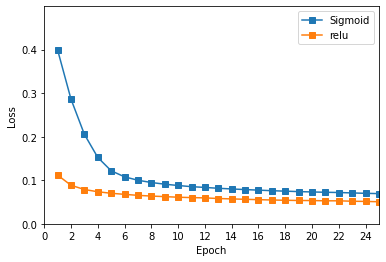

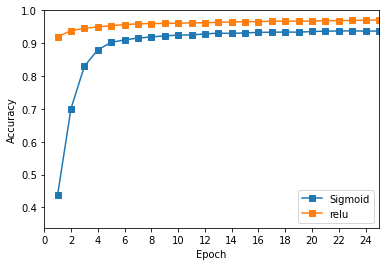

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [15]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][25]	 Batch [0][429]	 Training Loss 2.6011	 Accuracy 0.1016
Epoch [0][25]	 Batch [50][429]	 Training Loss 1.7257	 Accuracy 0.5849
Epoch [0][25]	 Batch [100][429]	 Training Loss 1.4054	 Accuracy 0.6868
Epoch [0][25]	 Batch [150][429]	 Training Loss 1.2238	 Accuracy 0.7292
Epoch [0][25]	 Batch [200][429]	 Training Loss 1.0858	 Accuracy 0.7590
Epoch [0][25]	 Batch [250][429]	 Training Loss 0.9963	 Accuracy 0.7776
Epoch [0][25]	 Batch [300][429]	 Training Loss 0.9233	 Accuracy 0.7924
Epoch [0][25]	 Batch [350][429]	 Training Loss 0.8665	 Accuracy 0.8028
Epoch [0][25]	 Batch [400][429]	 Training Loss 0.8216	 Accuracy 0.8110

Epoch [0]	 Average training loss 0.7976	 Average training accuracy 0.8158
Epoch [0]	 Average validation loss 0.3822	 Average validation accuracy 0.9056

Epoch [1][25]	 Batch [0][429]	 Training Loss 0.6628	 Accuracy 0.7656
Epoch [1][25]	 Batch [50][429]	 Training Loss 0.4243	 Accuracy 0.8897
Epoch [1][25]	 Batch [100][429]	 Training Loss 0.4309	 Accuracy 0.8864


### Test

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9555.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [18]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][25]	 Batch [0][429]	 Training Loss 2.5215	 Accuracy 0.0938
Epoch [0][25]	 Batch [50][429]	 Training Loss 0.9453	 Accuracy 0.7319
Epoch [0][25]	 Batch [100][429]	 Training Loss 0.7081	 Accuracy 0.8038
Epoch [0][25]	 Batch [150][429]	 Training Loss 0.6106	 Accuracy 0.8290
Epoch [0][25]	 Batch [200][429]	 Training Loss 0.5412	 Accuracy 0.8479
Epoch [0][25]	 Batch [250][429]	 Training Loss 0.5017	 Accuracy 0.8584
Epoch [0][25]	 Batch [300][429]	 Training Loss 0.4675	 Accuracy 0.8678
Epoch [0][25]	 Batch [350][429]	 Training Loss 0.4427	 Accuracy 0.8745
Epoch [0][25]	 Batch [400][429]	 Training Loss 0.4244	 Accuracy 0.8795

Epoch [0]	 Average training loss 0.4139	 Average training accuracy 0.8825
Epoch [0]	 Average validation loss 0.2123	 Average validation accuracy 0.9413

Epoch [1][25]	 Batch [0][429]	 Training Loss 0.3680	 Accuracy 0.8672
Epoch [1][25]	 Batch [50][429]	 Training Loss 0.2304	 Accuracy 0.9358
Epoch [1][25]	 Batch [100][429]	 Training Loss 0.2419	 Accuracy 0.9315


In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9793.



## Plot

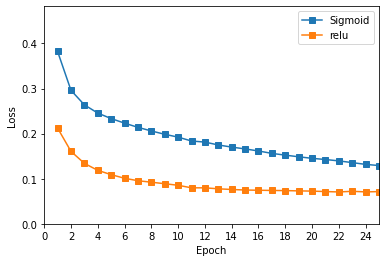

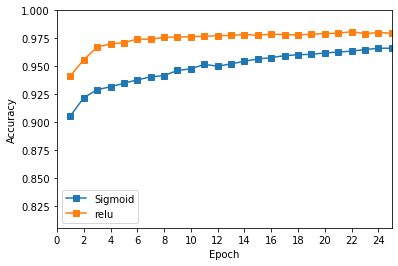

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework2-mlp, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

# 3. MLP with two-hidden-layer  


In [22]:
criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 3.1 2-Hidden-Layer MLP with Euclidean Loss Loss and Sigmoid Activation Function  

In [23]:
sigmoidMLP = Network()

sigmoidMLP.add(FCLayer(784, 256))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(256, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [24]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][25]	 Batch [0][429]	 Training Loss 5.4836	 Accuracy 0.1406
Epoch [0][25]	 Batch [50][429]	 Training Loss 3.2771	 Accuracy 0.0954
Epoch [0][25]	 Batch [100][429]	 Training Loss 1.8773	 Accuracy 0.1030
Epoch [0][25]	 Batch [150][429]	 Training Loss 1.4043	 Accuracy 0.1139
Epoch [0][25]	 Batch [200][429]	 Training Loss 1.1666	 Accuracy 0.1198
Epoch [0][25]	 Batch [250][429]	 Training Loss 1.0235	 Accuracy 0.1253
Epoch [0][25]	 Batch [300][429]	 Training Loss 0.9280	 Accuracy 0.1286
Epoch [0][25]	 Batch [350][429]	 Training Loss 0.8596	 Accuracy 0.1320
Epoch [0][25]	 Batch [400][429]	 Training Loss 0.8083	 Accuracy 0.1345

Epoch [0]	 Average training loss 0.7847	 Average training accuracy 0.1364
Epoch [0]	 Average validation loss 0.4472	 Average validation accuracy 0.1450

Epoch [1][25]	 Batch [0][429]	 Training Loss 0.4488	 Accuracy 0.1328
Epoch [1][25]	 Batch [50][429]	 Training Loss 0.4473	 Accuracy 0.1486
Epoch [1][25]	 Batch [100][429]	 Training Loss 0.4473	 Accuracy 0.1542


In [25]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9200.



## 3.2 2-Hidden-Layer MLP with Euclidean Loss and ReLU Activation Function

In [26]:
reluMLP = Network()

reluMLP.add(FCLayer(784, 256))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(256, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [27]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][25]	 Batch [0][429]	 Training Loss 3.1734	 Accuracy 0.0938
Epoch [0][25]	 Batch [50][429]	 Training Loss 3.5048	 Accuracy 0.3721
Epoch [0][25]	 Batch [100][429]	 Training Loss 1.9195	 Accuracy 0.5005
Epoch [0][25]	 Batch [150][429]	 Training Loss 1.3676	 Accuracy 0.5807
Epoch [0][25]	 Batch [200][429]	 Training Loss 1.0786	 Accuracy 0.6380
Epoch [0][25]	 Batch [250][429]	 Training Loss 0.9011	 Accuracy 0.6760
Epoch [0][25]	 Batch [300][429]	 Training Loss 0.7783	 Accuracy 0.7063
Epoch [0][25]	 Batch [350][429]	 Training Loss 0.6891	 Accuracy 0.7286
Epoch [0][25]	 Batch [400][429]	 Training Loss 0.6215	 Accuracy 0.7459

Epoch [0]	 Average training loss 0.5893	 Average training accuracy 0.7553
Epoch [0]	 Average validation loss 0.1152	 Average validation accuracy 0.9133

Epoch [1][25]	 Batch [0][429]	 Training Loss 0.1695	 Accuracy 0.7969
Epoch [1][25]	 Batch [50][429]	 Training Loss 0.1218	 Accuracy 0.8978
Epoch [1][25]	 Batch [100][429]	 Training Loss 0.1222	 Accuracy 0.8949


In [28]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9601.



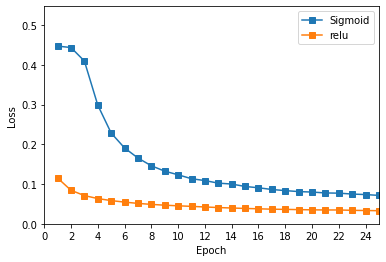

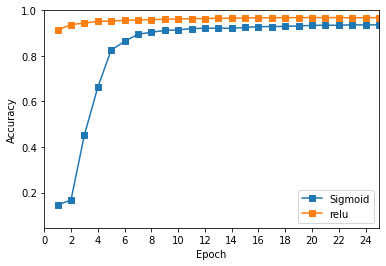

In [29]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 3.3 2-Hidden-Layer MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function  

In [30]:
criterion = SoftmaxCrossEntropyLossLayer()
sigmoidMLP = Network()

sigmoidMLP.add(FCLayer(784, 256))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(256, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [31]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][25]	 Batch [0][429]	 Training Loss 2.6037	 Accuracy 0.1016
Epoch [0][25]	 Batch [50][429]	 Training Loss 2.1986	 Accuracy 0.2730
Epoch [0][25]	 Batch [100][429]	 Training Loss 2.0350	 Accuracy 0.4109
Epoch [0][25]	 Batch [150][429]	 Training Loss 1.8661	 Accuracy 0.4973
Epoch [0][25]	 Batch [200][429]	 Training Loss 1.6919	 Accuracy 0.5617
Epoch [0][25]	 Batch [250][429]	 Training Loss 1.5526	 Accuracy 0.6048
Epoch [0][25]	 Batch [300][429]	 Training Loss 1.4321	 Accuracy 0.6400
Epoch [0][25]	 Batch [350][429]	 Training Loss 1.3321	 Accuracy 0.6674
Epoch [0][25]	 Batch [400][429]	 Training Loss 1.2485	 Accuracy 0.6884

Epoch [0]	 Average training loss 1.2057	 Average training accuracy 0.6992
Epoch [0]	 Average validation loss 0.5246	 Average validation accuracy 0.8724

Epoch [1][25]	 Batch [0][429]	 Training Loss 0.8177	 Accuracy 0.7734
Epoch [1][25]	 Batch [50][429]	 Training Loss 0.5468	 Accuracy 0.8666
Epoch [1][25]	 Batch [100][429]	 Training Loss 0.5419	 Accuracy 0.8664


In [32]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9526.



## 3.4 2-Hidden-Layer MLP with Softmax Cross-Entropy Loss and ReLU Activation Function

In [33]:
reluMLP = Network()

reluMLP.add(FCLayer(784, 256))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(256, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [34]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][25]	 Batch [0][429]	 Training Loss 2.5506	 Accuracy 0.0625
Epoch [0][25]	 Batch [50][429]	 Training Loss 0.7623	 Accuracy 0.7843
Epoch [0][25]	 Batch [100][429]	 Training Loss 0.5701	 Accuracy 0.8384
Epoch [0][25]	 Batch [150][429]	 Training Loss 0.4926	 Accuracy 0.8587
Epoch [0][25]	 Batch [200][429]	 Training Loss 0.4375	 Accuracy 0.8743
Epoch [0][25]	 Batch [250][429]	 Training Loss 0.4069	 Accuracy 0.8832
Epoch [0][25]	 Batch [300][429]	 Training Loss 0.3773	 Accuracy 0.8917
Epoch [0][25]	 Batch [350][429]	 Training Loss 0.3551	 Accuracy 0.8984
Epoch [0][25]	 Batch [400][429]	 Training Loss 0.3400	 Accuracy 0.9025

Epoch [0]	 Average training loss 0.3306	 Average training accuracy 0.9052
Epoch [0]	 Average validation loss 0.1694	 Average validation accuracy 0.9545

Epoch [1][25]	 Batch [0][429]	 Training Loss 0.2328	 Accuracy 0.9219
Epoch [1][25]	 Batch [50][429]	 Training Loss 0.1599	 Accuracy 0.9554
Epoch [1][25]	 Batch [100][429]	 Training Loss 0.1705	 Accuracy 0.9520


In [35]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9792.



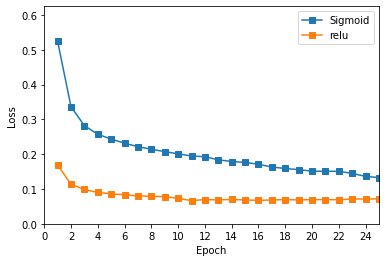

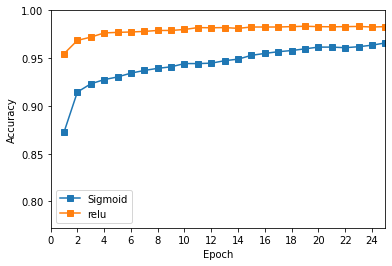

In [36]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})